In [52]:
df <- read.csv('White_snp_genes140725.csv')

In [60]:
genes <- read.csv('genes_df_hg38.csv')

In [3]:
library(dplyr)
library(tidyr)

In [4]:
df2 <- df %>%
  separate_rows(Segment, sep = ",") %>%          # Split Segment column into multiple rows
  group_by(Segment) %>%
  summarise(Genes = paste(unique(Gene), collapse = ",")) %>%   # Combine genes for each segment
  ungroup()

In [6]:
write.csv(df2,'White_genes_segment.csv')

In [ ]:
### NEXT ###

In [124]:
df <- read.csv('WHITE_hg38.csv')

In [148]:
segments <- grep("^segment_", names(df), value = TRUE)
least_sig_pvals <- sapply(segments, function(seg) {
  ord <- df[order(df[[seg]]), ]
  max(head(ord[[seg]], 100), na.rm = TRUE)
})

In [150]:
least_sig_pvals

segment_1    segment_2    segment_3    segment_4    segment_5    segment_6 
7.839710e-48 1.315831e-33 1.059986e-50 8.037112e-20 6.996809e-34 4.048555e-54 
   segment_7    segment_8    segment_9   segment_10   segment_11   segment_12 
1.360191e-33 5.251701e-18 5.048938e-12 2.101358e-15 3.083898e-42 1.449439e-28 
  segment_13   segment_14   segment_15   segment_16   segment_17   segment_18 
4.709773e-57 4.648363e-40 4.865192e-12 2.313130e-06 4.827252e-14 1.458478e-12 
  segment_19   segment_20   segment_21   segment_22   segment_23   segment_24 
2.451320e-13 1.274090e-12 5.888437e-11 6.098177e-31 6.197264e-18 2.997782e-09 
  segment_25   segment_26   segment_27   segment_28   segment_29   segment_30 
2.722701e-30 2.494595e-54 1.722662e-43 4.430982e-31 8.623826e-35 8.992905e-09 
  segment_31   segment_32   segment_33   segment_34   segment_35   segment_36 
1.330761e-08 1.127457e-07 8.540828e-08 9.414559e-18 2.973719e-11 6.951844e-12 
  segment_37   segment_38   segment_39   segment_40   segment_41   segment_42 
1.402491e-11 3.818563e-19 5.339493e-08 5.587274e-10 1.616590e-11 1.129536e-07 
  segment_43   segment_44   segment_45   segment_46   segment_47   segment_48 
4.956784e-10 5.862731e-24 2.233058e-19 1.260956e-11 1.162787e-12 2.660725e-08 
  segment_49   segment_50   segment_51   segment_52   segment_53   segment_54 
3.151374e-09 1.306171e-11 2.421029e-31 1.847566e-07 2.646671e-69 2.258396e-41 
  segment_55   segment_56   segment_57   segment_58   segment_59   segment_60 
1.743010e-16 1.750250e-15 1.611388e-29 8.245177e-08 2.435567e-26 3.280953e-10 
  segment_61   segment_62   segment_63 
1.779508e-09 4.082254e-06 1.853532e-09

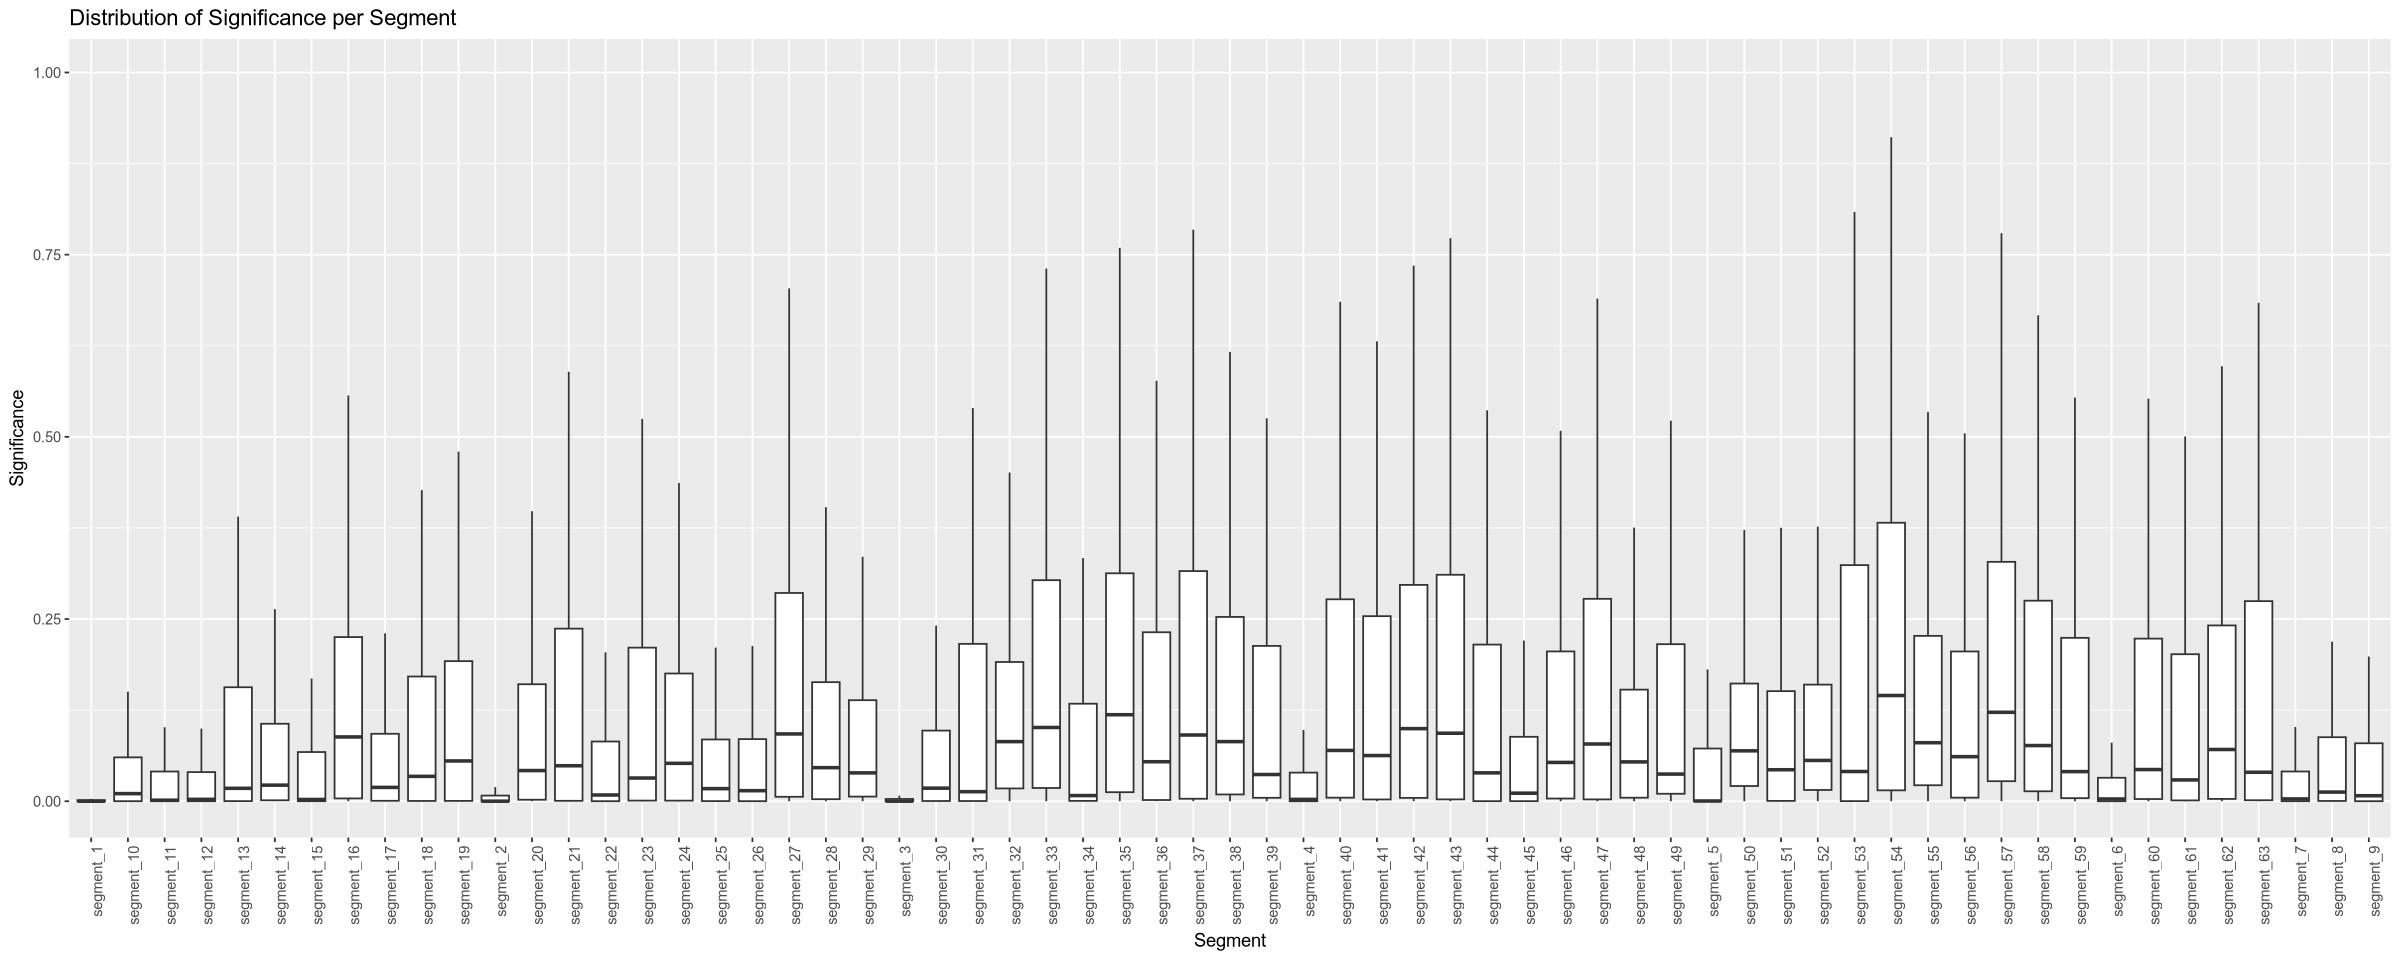

In [125]:
library(tidyr)
library(ggplot2)

# Assuming your data frame is called df and columns are like segment_2, segment_5, etc.

# Gather segment columns into long format
long_df <- df %>%
  pivot_longer(cols = starts_with("segment_"),
               names_to = "Segment",
               values_to = "Significance")

# Plot boxplot
ggplot(long_df, aes(x = Segment, y = Significance)) +
  geom_boxplot(outlier.shape = NA) +   # Outliers can be shown or hidden
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribution of Significance per Segment",
       y = "Significance")


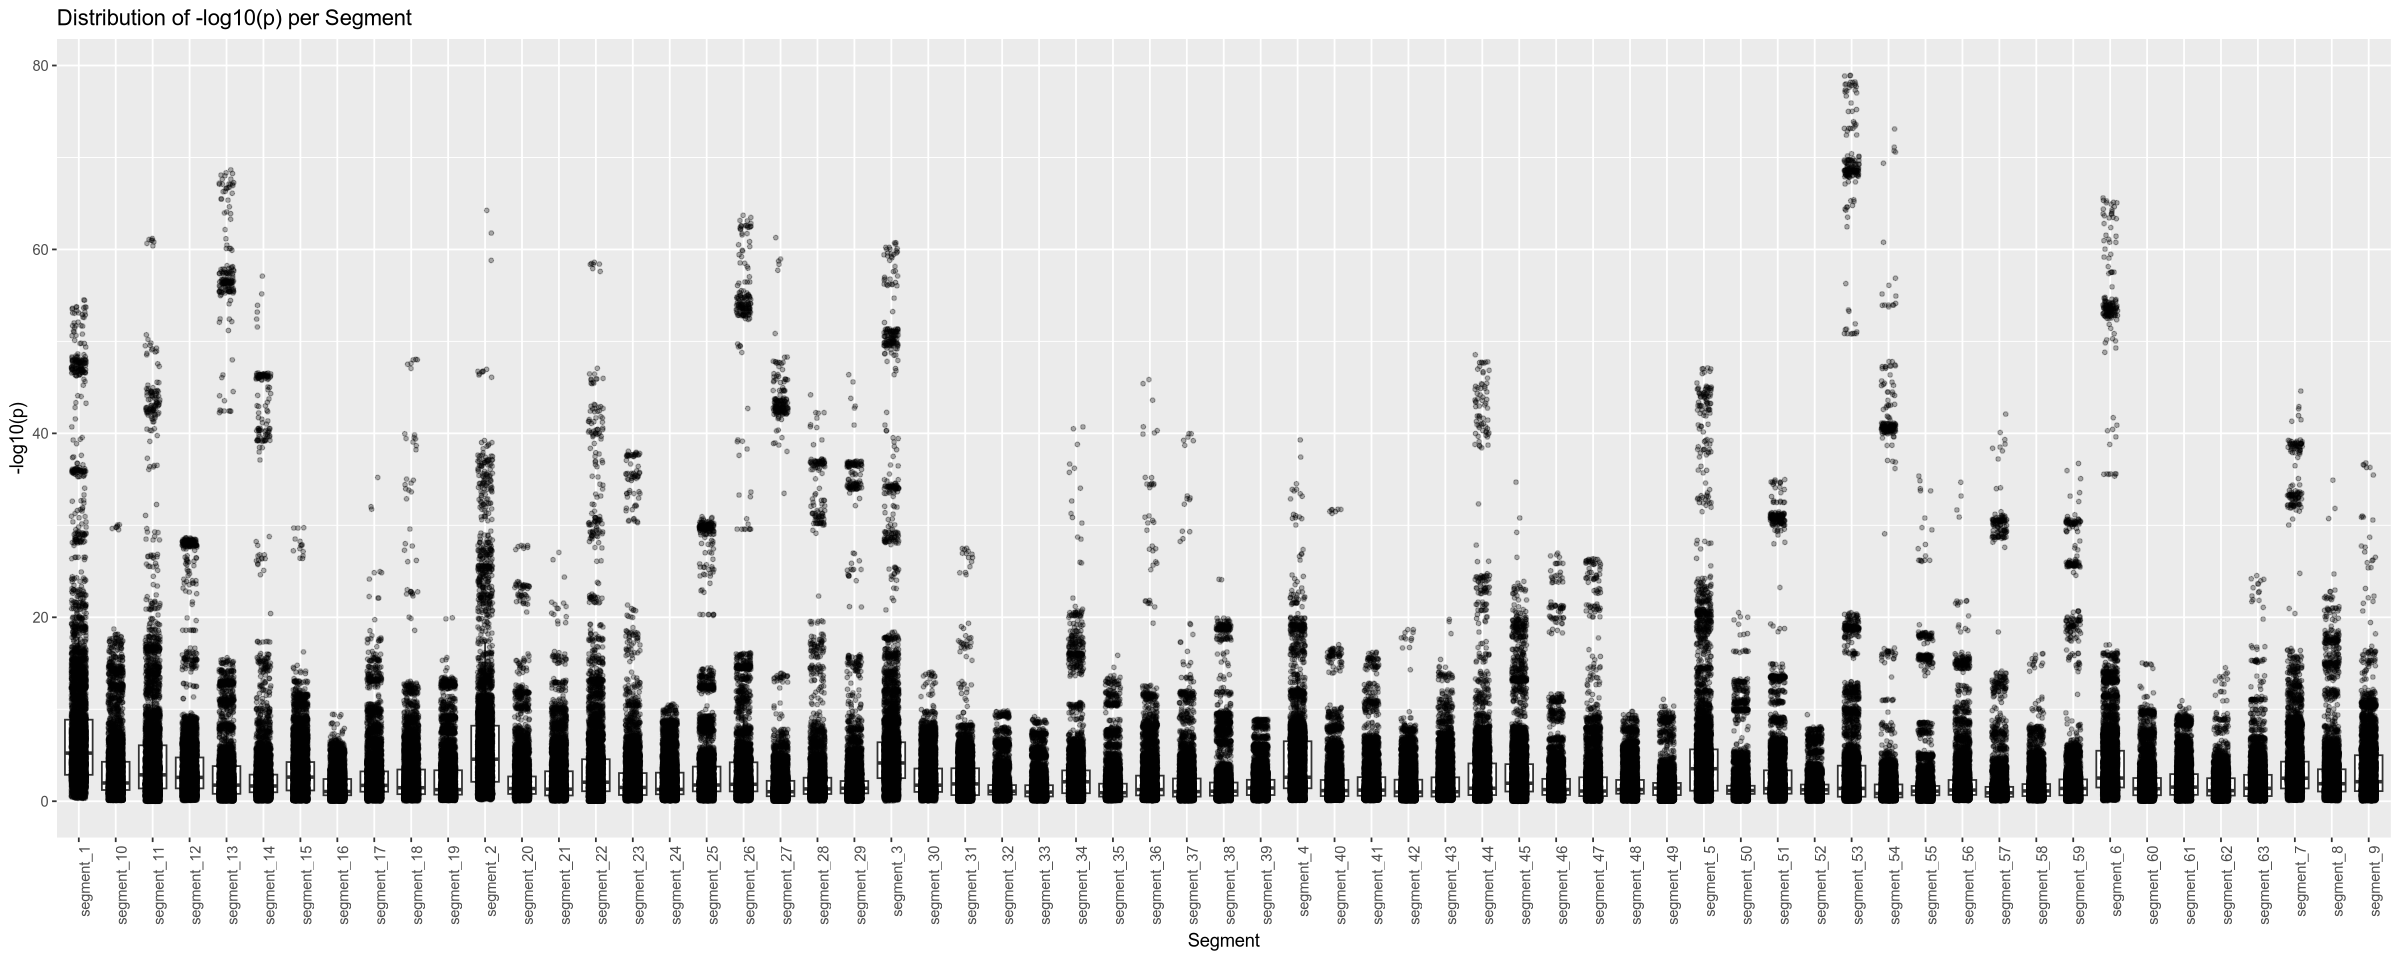

In [126]:
library(tidyr)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 20, repr.plot.height = 8)

# Reshape and transform to -log10(p)
long_df <- df %>%
  pivot_longer(cols = starts_with("segment_"),
               names_to = "Segment",
               values_to = "p") %>%
  mutate(logp = -log10(p))

# Plot -log10(p) distributions
#ggplot(long_df, aes(x = Segment, y = logp)) +
#  geom_boxplot(outlier.shape = NA) +
#  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
#  labs(title = "Distribution of -log10(p) per Segment",
#       y = "-log10(p)")


ggplot(long_df, aes(x = Segment, y = logp)) +
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(width = 0.2, alpha = 0.3, size = 1) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribution of -log10(p) per Segment",
       y = "-log10(p)")



In [209]:
long_df %>%
  group_by(Segment) %>%
  summarize(n_above_7 = sum(logp > 8.43))

Segment,n_above_7
<chr>,<int>
segment_1,1546
segment_10,444
segment_11,800
segment_12,341
segment_13,501
segment_14,287
segment_15,337
segment_16,6
segment_17,288


In [58]:
library(dplyr)
library(tidyr)

# Define the range of integer thresholds you want to check
thresholds <- min(floor(long_df$logp)):max(ceiling(long_df$logp))

# Count number of points above each threshold per segment
mat <- expand_grid(Segment = unique(long_df$Segment), threshold = thresholds) %>%
  left_join(long_df, by = "Segment") %>%
  group_by(Segment, threshold) %>%
  summarize(n = sum(logp > threshold), .groups = "drop") %>%
  pivot_wider(names_from = threshold, values_from = n)

mat


Warning message in left_join(., long_df, by = "Segment"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Segment,0,1,2,3,4,5,6,7,8,⋯,70,71,72,73,74,75,76,77,78,79
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
segment_1,5805,5663,5273,4163,3690,3019,2618,2107,1646,⋯,0,0,0,0,0,0,0,0,0,0
segment_10,5805,4656,2880,2177,1629,1073,833,569,472,⋯,0,0,0,0,0,0,0,0,0,0
segment_11,5805,4837,3459,2857,2127,1812,1489,1128,868,⋯,0,0,0,0,0,0,0,0,0,0
segment_12,5805,4907,3625,2363,1684,1322,921,516,408,⋯,0,0,0,0,0,0,0,0,0,0
segment_13,5805,3785,2671,1722,1257,764,627,596,550,⋯,0,0,0,0,0,0,0,0,0,0
segment_14,5805,4302,2427,1330,862,572,428,361,301,⋯,0,0,0,0,0,0,0,0,0,0
segment_15,5805,4549,3496,2620,1706,1201,856,562,372,⋯,0,0,0,0,0,0,0,0,0,0
segment_16,5805,3044,1772,992,470,298,73,16,8,⋯,0,0,0,0,0,0,0,0,0,0
segment_17,5805,4433,2575,1721,1087,673,548,399,323,⋯,0,0,0,0,0,0,0,0,0,0


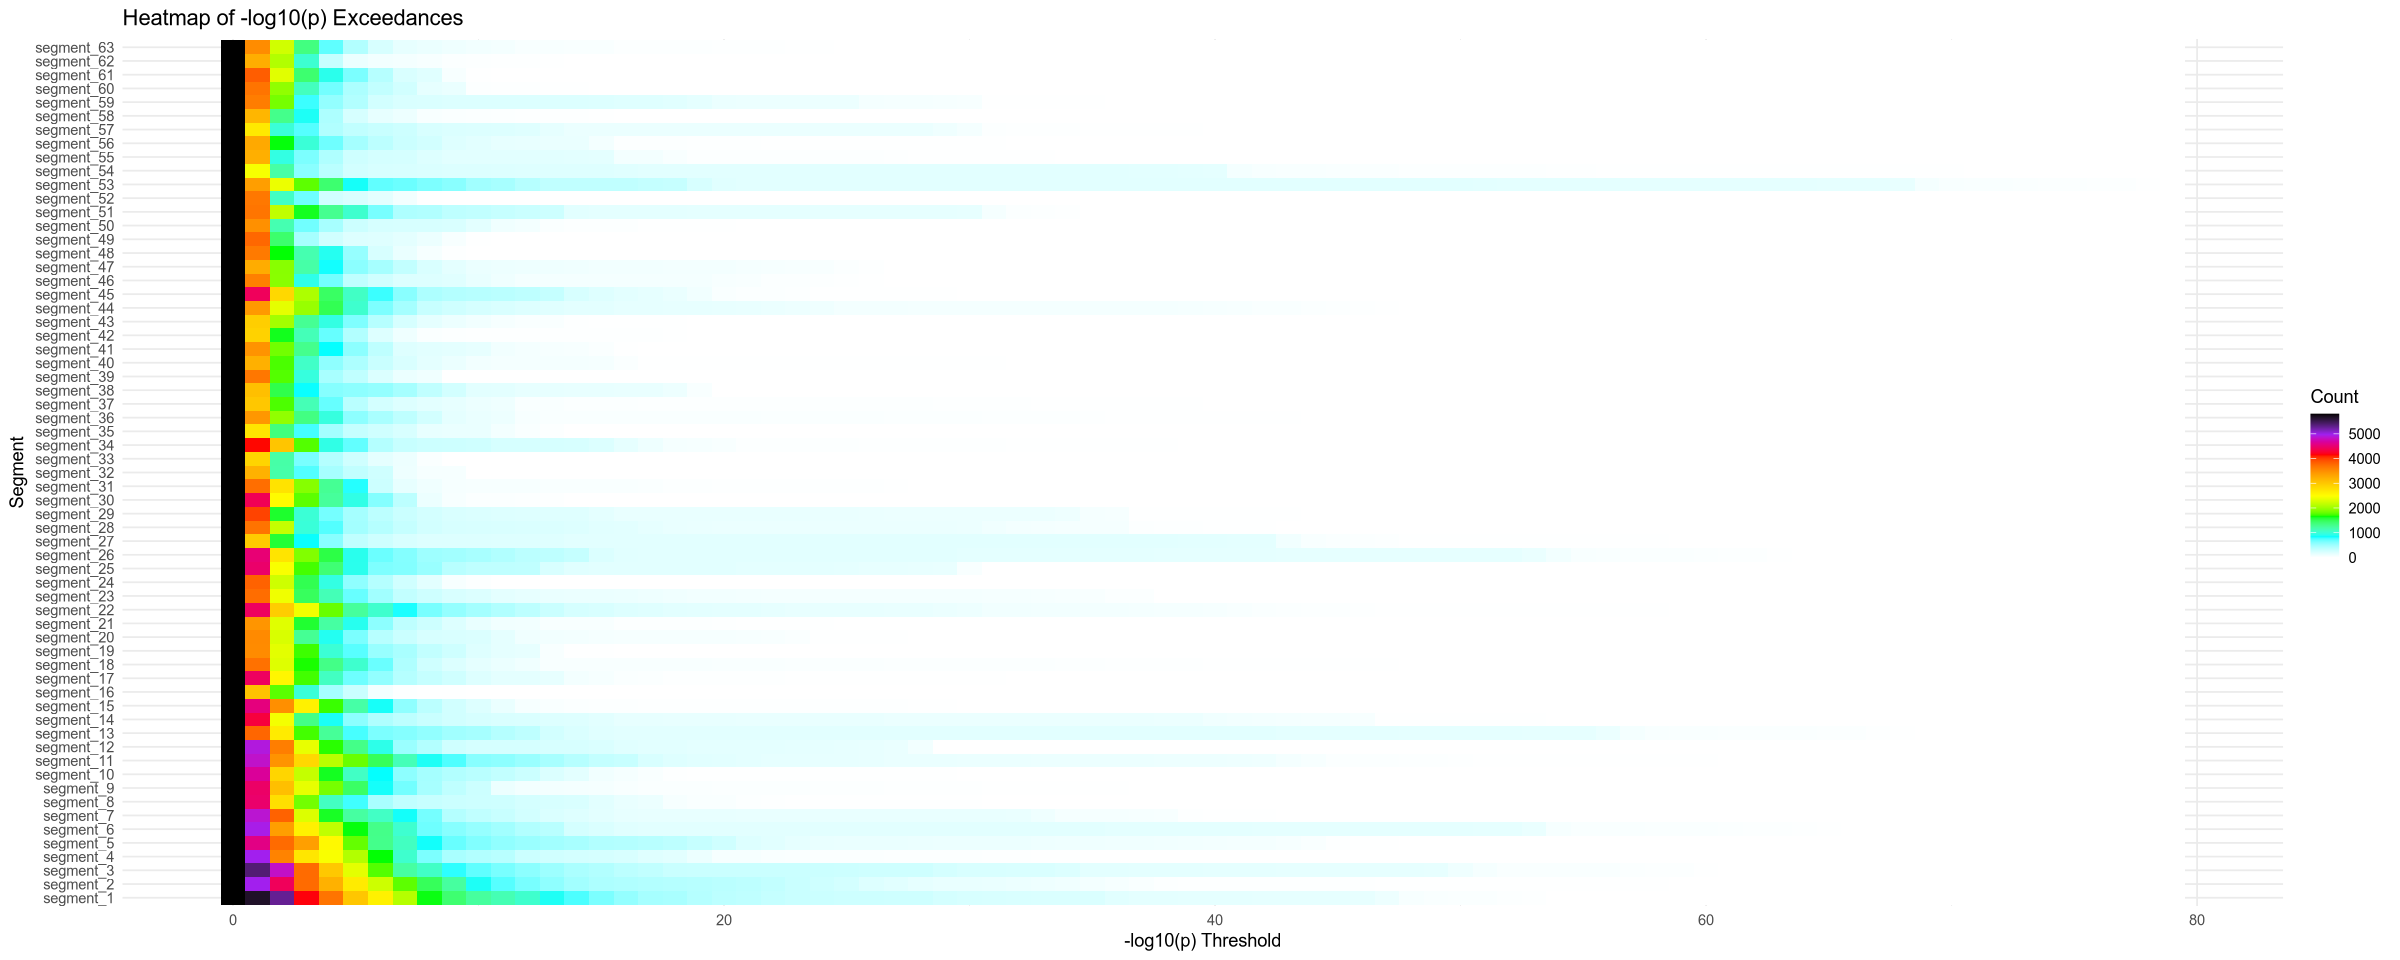

In [59]:
library(ggplot2)

# First, convert to long format for plotting
mat_long <- mat %>%
  pivot_longer(-Segment, names_to = "threshold", values_to = "n") %>%
  mutate(threshold = as.integer(threshold))

mat_long <- mat_long %>%
  mutate(Segment_num = as.integer(gsub("segment_", "", Segment))) %>%
  arrange(Segment_num) %>%
  mutate(Segment = factor(Segment, levels = unique(Segment[order(Segment_num)])))

# Plot heatmap
ggplot(mat_long, aes(x = threshold, y = Segment, fill = n)) +
  geom_tile() +
  scale_fill_gradientn(
    colours = c("white", "cyan", "green", "yellow", "orange", "red", "purple", "black"),
    name = "Count"
  ) +
  labs(x = "-log10(p) Threshold", y = "Segment", title = "Heatmap of -log10(p) Exceedances") +
  theme_minimal()


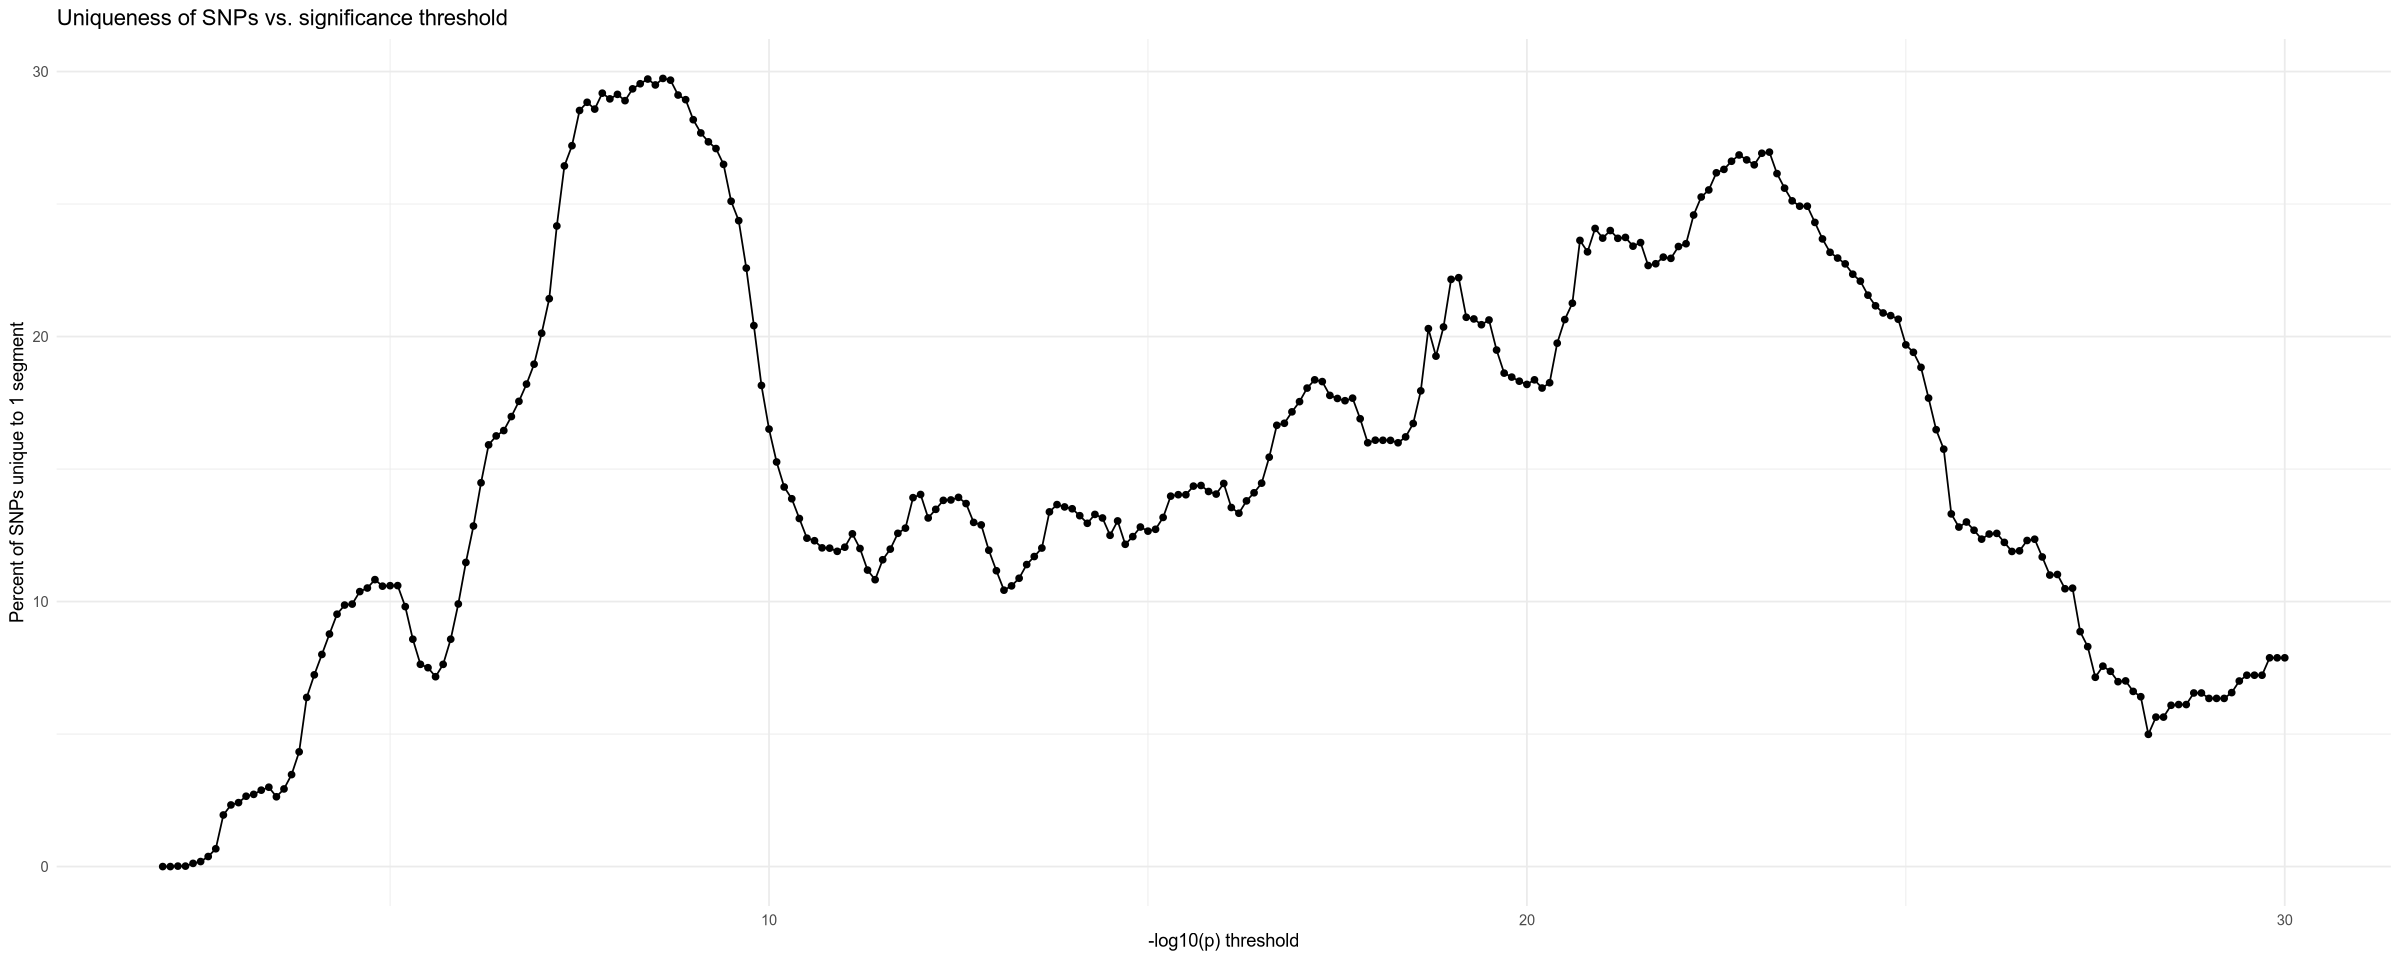

In [182]:
library(dplyr)
library(tidyr)
library(ggplot2)

thresholds <- seq(2, 30, by = 0.1)  # Example thresholds
results <- data.frame(threshold = thresholds, percent_unique = NA)

for(i in seq_along(thresholds)) {
  th <- thresholds[i]
  sig <- long_snps %>% filter(logp >= th)
  snp_counts <- sig %>% count(rsid)
  unique_snps <- snp_counts %>% filter(n == 1)
  percent_unique <- 100 * nrow(unique_snps) / n_distinct(sig$rsid)
  results$percent_unique[i] <- percent_unique
}

ggplot(results, aes(x = threshold, y = percent_unique)) +
  geom_line() +
  geom_point() +
  labs(x = "-log10(p) threshold",
       y = "Percent of SNPs unique to 1 segment",
       title = "Uniqueness of SNPs vs. significance threshold") +
  theme_minimal()

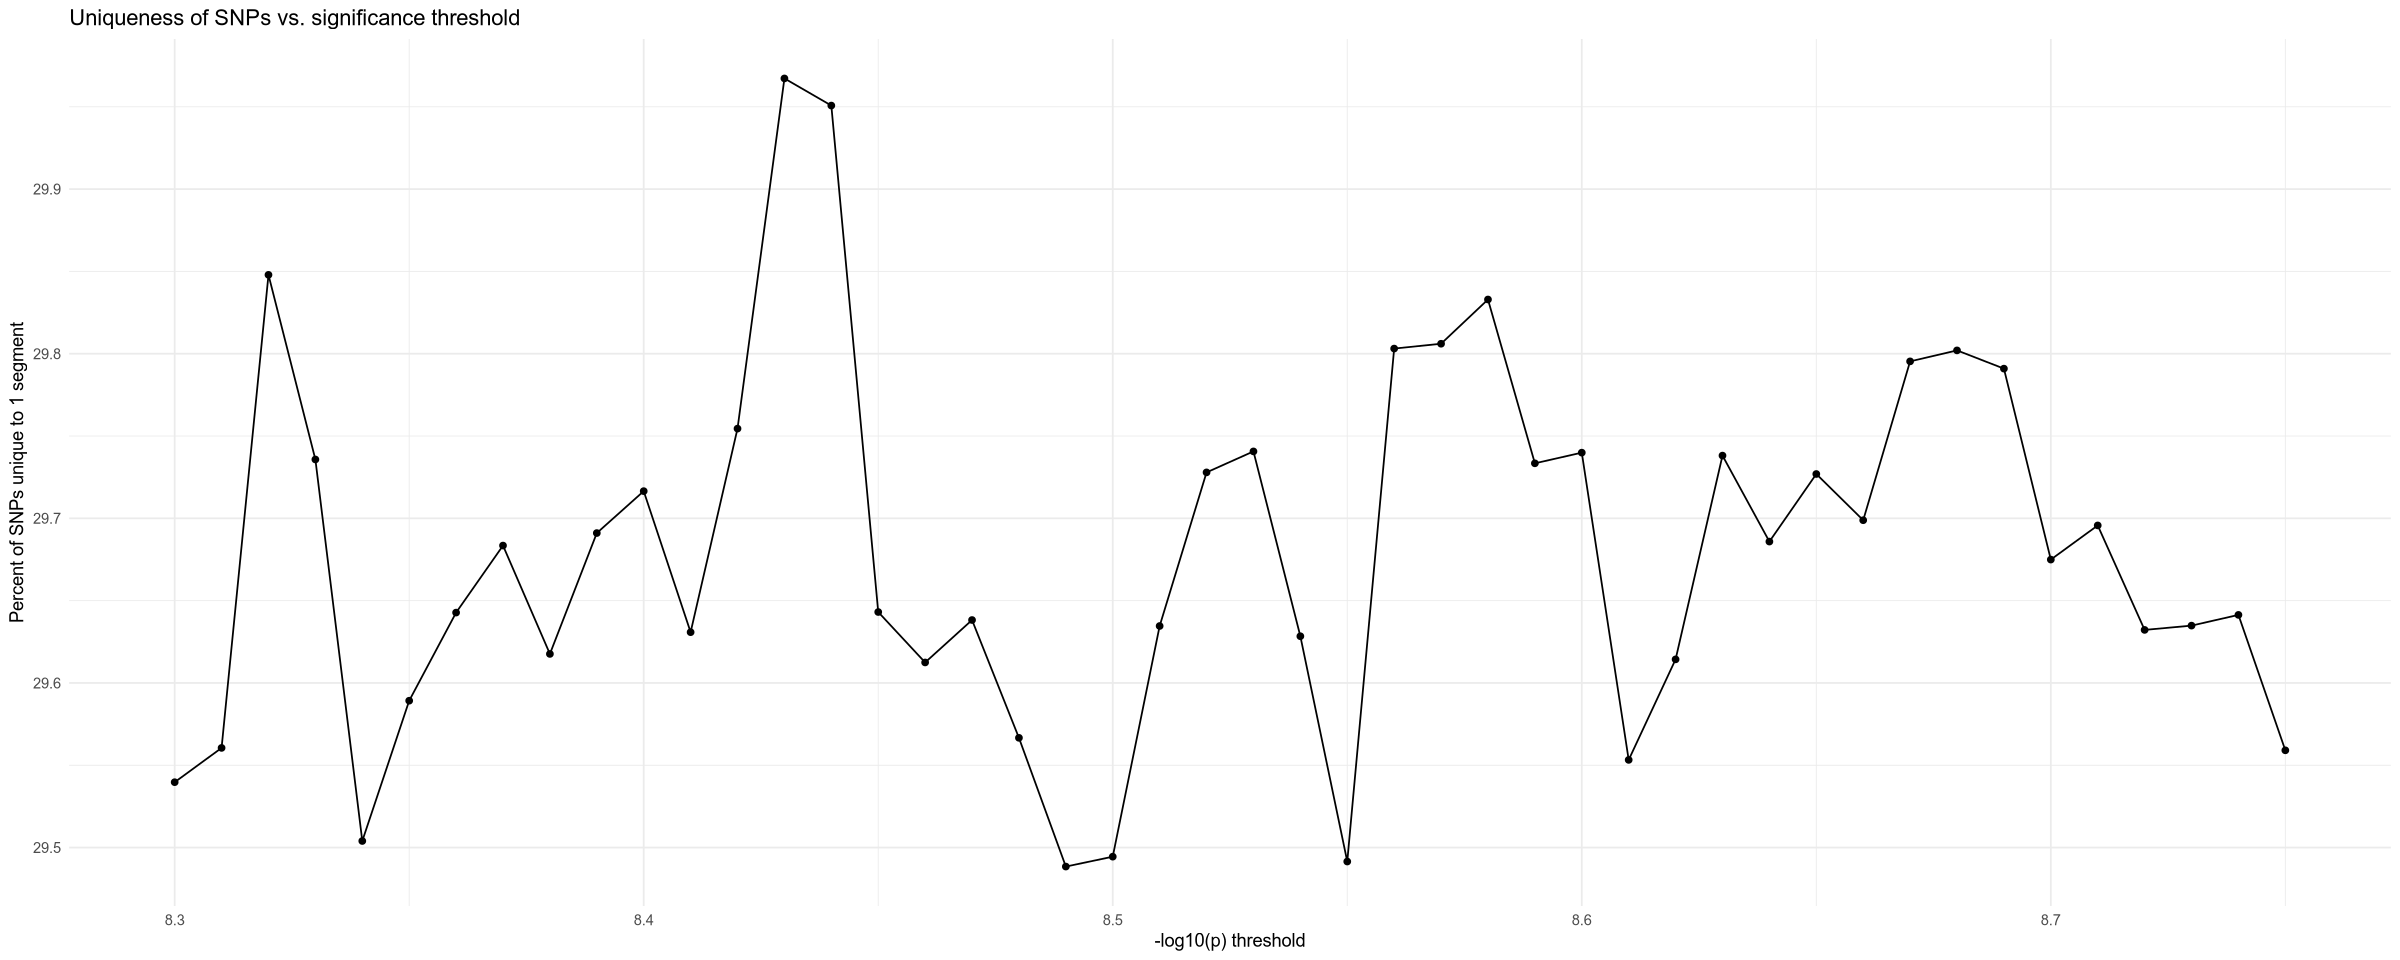

In [179]:
library(dplyr)
library(tidyr)
library(ggplot2)

thresholds <- seq(8.3, 8.75, by = 0.01)  # Example thresholds
results <- data.frame(threshold = thresholds, percent_unique = NA)

for(i in seq_along(thresholds)) {
  th <- thresholds[i]
  sig <- long_snps %>% filter(logp >= th)
  snp_counts <- sig %>% count(rsid)
  unique_snps <- snp_counts %>% filter(n == 1)
  percent_unique <- 100 * nrow(unique_snps) / n_distinct(sig$rsid)
  results$percent_unique[i] <- percent_unique
}

ggplot(results, aes(x = threshold, y = percent_unique)) +
  geom_line() +
  geom_point() +
  labs(x = "-log10(p) threshold",
       y = "Percent of SNPs unique to 1 segment",
       title = "Uniqueness of SNPs vs. significance threshold") +
  theme_minimal()

In [180]:
library(dplyr)
library(tidyr)

# Gather segment columns to long format
long_snps <- df %>%
  pivot_longer(
    cols = starts_with("segment_"),
    names_to = "Segment",
    values_to = "p"
  ) %>%
  mutate(logp = -log10(p))

# Filter for SNPs exceeding -log10(p) >= 8
sig_snps <- long_snps %>%
  filter(logp >= 8.43)

# Output: sig_snps will have one row per (SNP, segment) combination that passes the threshold
# View the top rows:
head(sig_snps)


X,rsid,CHR_hg19,POS_hg19,A1,A2,MAF,N,chr_hg38,pos_hg38,Segment,p,logp
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,rs10001628,chr4,175056150,A,G,0.3225806,7514,chr4,174134999,segment_6,5.657180e-10,9.2474
1,rs10001628,chr4,175056150,A,G,0.3225806,7514,chr4,174134999,segment_13,9.714043e-16,15.0126
1,rs10001628,chr4,175056150,A,G,0.3225806,7514,chr4,174134999,segment_27,4.727157e-14,13.3254
1,rs10001628,chr4,175056150,A,G,0.3225806,7514,chr4,174134999,segment_53,1.319168e-20,19.8797
1,rs10001628,chr4,175056150,A,G,0.3225806,7514,chr4,174134999,segment_54,9.673864e-17,16.0144
3,rs10002205,chr4,175053051,G,A,0.3199342,7508,chr4,174131900,segment_6,2.082092e-09,8.6815


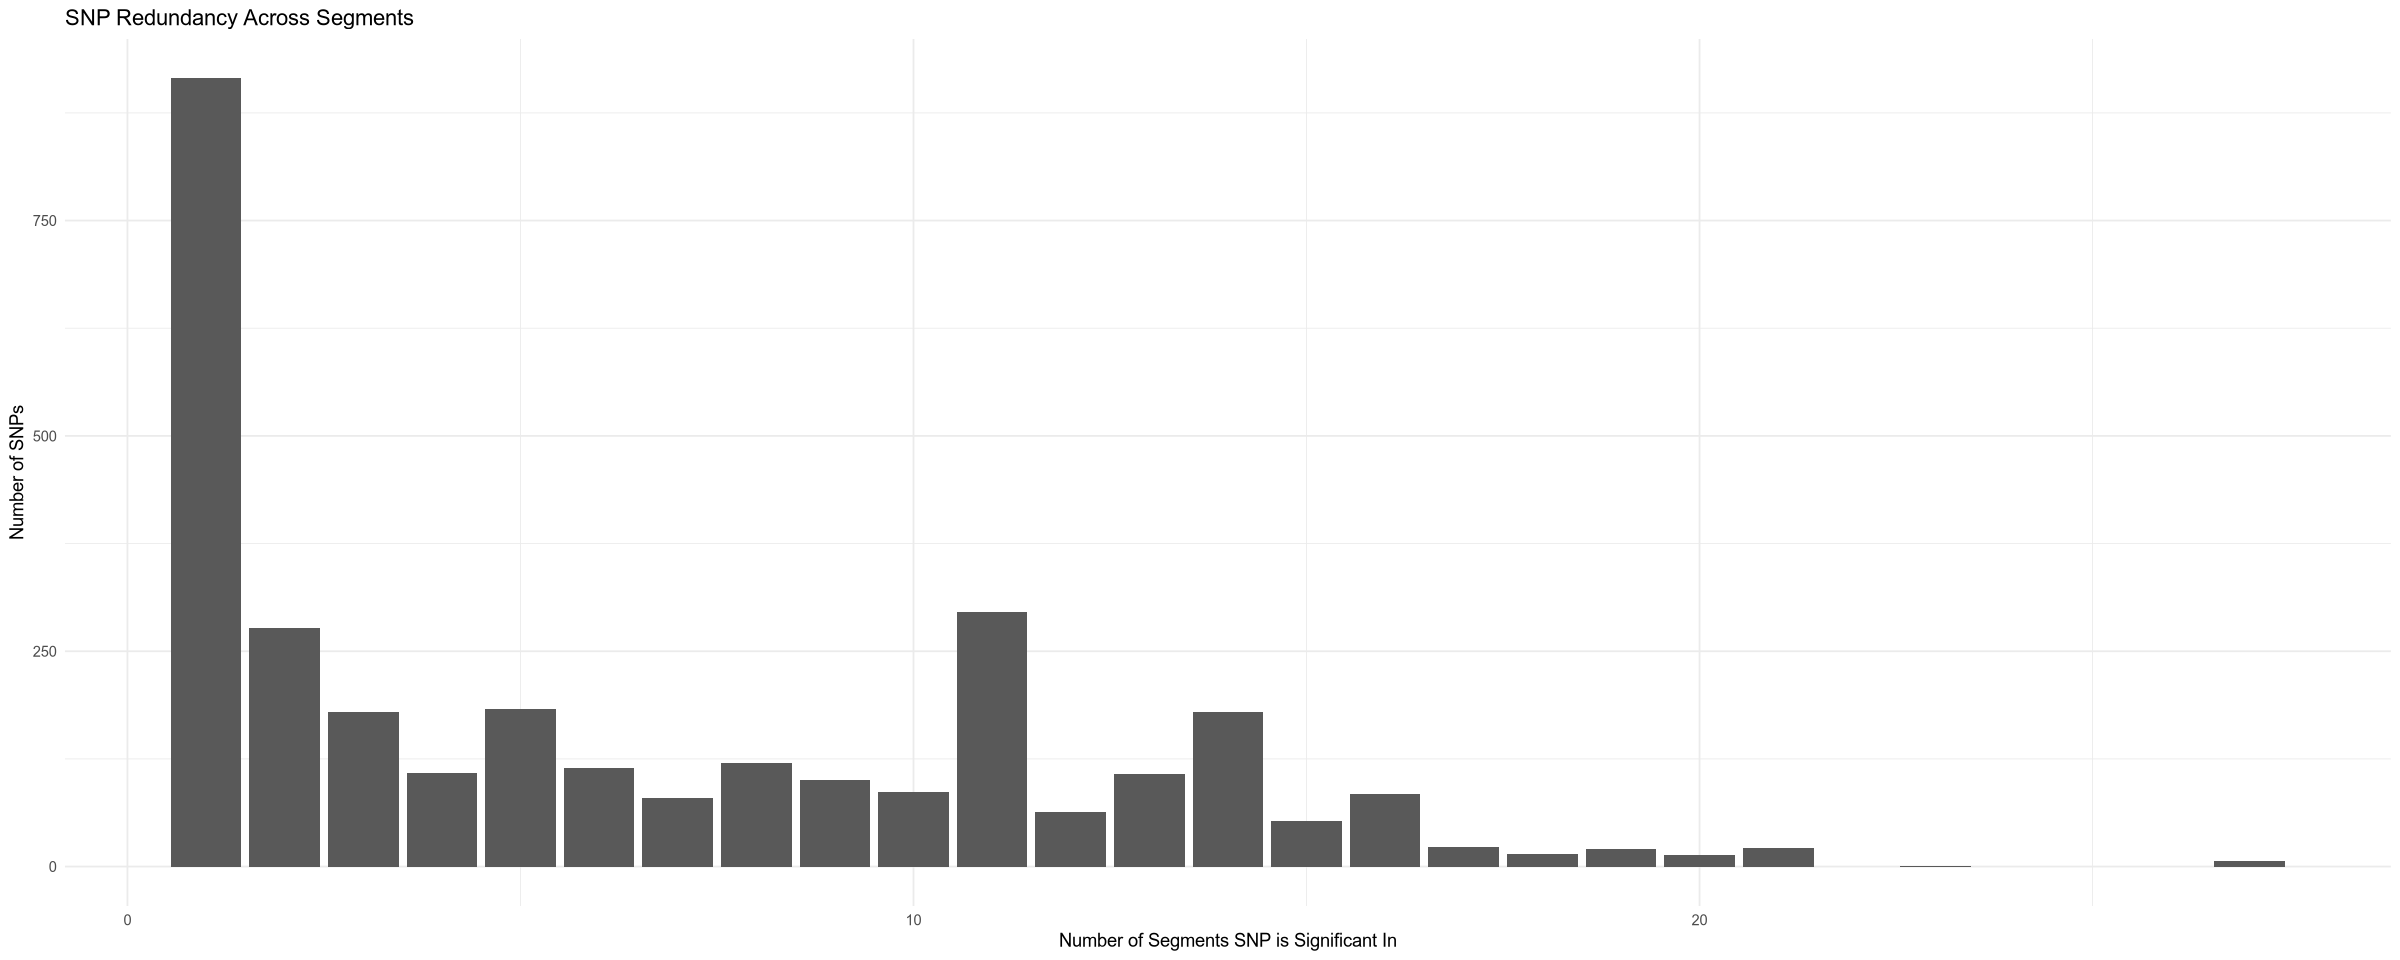

In [183]:
library(dplyr)
library(ggplot2)

# Count segments per SNP
redundancy <- sig_snps %>%
  count(rsid, name = "n_segments")

# Barplot: How many SNPs are significant in how many segments?
ggplot(redundancy, aes(x = n_segments)) +
  geom_bar() +
  labs(x = "Number of Segments SNP is Significant In", y = "Number of SNPs",
       title = "SNP Redundancy Across Segments") +
  theme_minimal()


In [188]:
# Read your CSV as usual
cluster_expr <- read.csv('white_gene_cluster55_averages_july2025.csv')
genes <- read.csv('genes_df_hg38.csv')


# Set gene names from 'X' column as rownames, then remove the X column
rownames(cluster_expr) <- cluster_expr$X
cluster_expr$X <- NULL

# Now ref_genes will be gene symbols!
ref_genes <- rownames(cluster_expr)

# Sanity check:
head(ref_genes)

[1] "AARS2"  "AASS"   "ABCA10" "ABCA5"  "ABCC4"  "ABCF3"

In [199]:
library(GenomicRanges)
library(dplyr)
library(tidyr)

# 1. Create GRanges for genes with 5kb buffer
gene_gr <- GRanges(
  seqnames = genes$seqnames,
  ranges = IRanges(start = pmax(1, genes$start - 500000), end = genes$end + 500000),
  SYMBOL = genes$SYMBOL
)

# 2. Clean SNPs (remove NAs)
sig_snps_clean <- sig_snps %>%
  filter(!is.na(pos_hg38), !is.na(chr_hg38))

# 3. Make SNP GRanges
snp_gr <- GRanges(
  seqnames = sig_snps_clean$chr_hg38,
  ranges = IRanges(start = sig_snps_clean$pos_hg38, end = sig_snps_clean$pos_hg38),
  rsid = sig_snps_clean$rsid
)

# 4. Overlap SNPs to genes
hits <- findOverlaps(snp_gr, gene_gr)
mapped <- data.frame(
  rsid = mcols(snp_gr)$rsid[queryHits(hits)],
  gene = mcols(gene_gr)$SYMBOL[subjectHits(hits)]
)

# 5. Merge mapped genes to SNP-segment table
sig_snps_mapped <- sig_snps_clean %>%
  left_join(mapped, by = "rsid")

# 6. Prepare reference gene list (from cluster_expr)
ref_genes <- rownames(cluster_expr)

# 7. Map segment to filtered, unique gene list (in reference)
segment_genes <- sig_snps_mapped %>%
  filter(!is.na(gene)) %>%
  group_by(Segment) %>%
  summarize(
    genes = paste(
      unique(gene[gene %in% ref_genes]),
      collapse = ","
    )
  ) %>%
  ungroup()

# 8. Ensure all segments are present, in order (even if no mapped genes)
all_segments <- paste0("segment_", 1:63)  # Or modify as needed

segment_genes_full <- tibble(Segment = all_segments) %>%
  left_join(segment_genes, by = "Segment") %>%
  mutate(
    genes = ifelse(is.na(genes) | genes == "", "", genes)
  )

# View the result
head(segment_genes_full)


Warning message in left_join(., mapped, by = "rsid"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Segment,genes
<chr>,<chr>
segment_1,"TRIM2,MND1,TMEM131L,TLR2,RNF175,SFRP2,KIF3B,ASXL1,NOL4L,C20orf203,COMMD7,DNMT3B,MAPRE1,EFCAB8,SUN5,BPIFB2,BPIFB3,BPIFB4,BPIFA2,BPIFA3,BPIFA1,BPIFB1,FBN2,SLC27A6,ISOC1,PPP1R16B,FAM83D,DHX35,LINC01734,FAM3C,TSPAN12,KCND2,WNT16,ING3,CPED1,GLIS3,PLPP6,AK3,SPATA6L,CDC37L1,SLC1A1,TMEM245,ABITRAM,ELP1,CTNNAL1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,LINC02295,LINC01550,NAV3,NR2E3,CT62,MYO9A,LRRC49,THSD4,FARSB,MOGAT1,SGPP2,CCDC140,PAX3,LINC01117,HAGLROS,MTX2,HOXD1,HOXD3,HOXD4,HOXD8,HOXD9,HOXD10,HOXD13,EVX2,LINC01116,HAGLR,LNPK,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,SLC25A13,DLX5,DLX6,DYNC1I1,SEM1,LINC01432,LINC01427,LINC00261,FOXA2,LNCNEF,LINC01747,ASPM,ZBTB41,CRB1,DENND1B,C1orf53,LHX9,AHI1,PDE7B,MTFR2,BCLAF1,MAP7,SLC38A6,TMEM30B,MNAT1,SIX4,PRKCH,TRMT5,SIX1,WIF1,LEMD3,MSRB3,LINC02454,HMGA2,DCT,LINC02017,CACNA2D3,LRTM1,ESRG,TBX15,WARS2,LINC01780,HAO2,HSD3B2,HSD3B1,TBX3,TBC1D30,LINC02389,LINC02231,PRDM16,ARHGEF16,MEGF6,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,CEP104,CFHR4,BNC2,CNTLN,LINC02704,EXT2,ALKBH3,CD82,C11orf96,ACCSL,HSD17B12,ALX4,ACCS,TSPAN18,LINC02424,LINC02425,LLPH,TMBIM4,IRAK3,HELB,GRIP1,LINC00622,ZNF697,PHGDH,LINC01412,TEX41,ZEB2,CASC17,LINC02097,LINC01152,ROCR,LINC02003,LINC00511,SOX9,XRN2,LINC01727,LINC01726,PAX1,KCNS3,LINC01376,RDH14,NT5C1B,CENPW,RSPO3,RNF146,ECHDC1,GLI3,INHBA,NEK7,SLC6A15,TSPAN19,LRRIQ1,ALX1,LINC02820,FERD3L,TWIST1,HDAC9,ANKFN1,PCTP,NOG,LINC02070,CHMP2B,VGLL3,POU1F1,SDHAF3,GLP1R,SAYSD1,KCNK5,KCNK17,KIF6,DAAM2,MOCS1,FOXP1,EIF4E3,RSRC1,PTX3,SHOX2,VEPH1,MGLL,KBTBD12,LINC01565,GATA2,ACAD9,SEC61A1,RPN1,RAB7A,RUVBL1,LINC00343,EFNB2,ARGLU1,LINC00460,ANXA10,DDX60,DDX60L,PALLD,CBR4,C17orf67,SCPEP1,TRIM25,COIL,AKAP1,DGKE,MYMX,SLC29A1,HSP90AB1,SLC35B2,NFKBIE,TMEM151B,SPATS1,TCTE1,AARS2,CDC5L,SUPT3H,SIX2,LINC01833,LINC01121,SRBD1,SIX3,CAMKMT,MIR3663HG,LINC02674,VAX1,PDZD8,EMX2OS,EMX2,RAB11FIP2,KCNK18,SHTN1,SLC18A2,GMDS,LINC02521,LINC01600,MYLK4,WRNIP1,SERPINB1,SERPINB9P1,SERPINB9,VNN2,SLC18B1,RPS12,LINC00326,EYA4,TARID,VNN1,SH3RF1,LINC02004,EPHB1,ANAPC13,KY,AMOTL2,RAB6B,SRPRB,RYK,SLCO2A1,TF,CEP63,TMEM100,C14orf39,SIX6,LINC02464,MTBP,SNTB1"
segment_2,"TRIM2,MND1,TMEM131L,TLR2,RNF175,SFRP2,LINC01338,TMEM167A,XRCC4,FBN2,SLC27A6,ISOC1,PPP1R16B,FAM83D,DHX35,LINC01734,LINC02855,HAS2,SNTB1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,NR2E3,CT62,MYO9A,LRRC49,THSD4,FARSB,MOGAT1,SGPP2,CCDC140,ACSL3,KCNE4,PAX3,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,LINC01432,LINC01427,LINC00261,FOXA2,LNCNEF,LINC01747,LINC02070,CHMP2B,VGLL3,POU1F1,LINC00536,TRPS1,MTBP,WIF1,LEMD3,MSRB3,LINC02454,HMGA2,DCT,LINC02017,CACNA2D3,LRTM1,ESRG,FANCC,ERCC6L2,PTCH1,AOPEP,TBX3,TSPAN19,LRRIQ1,ALX1,LINC02820,RASSF9,NTS,MGAT4C,TBC1D30,LINC02389,LINC02231,PRDM16,ARHGEF16,MEGF6,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,CEP104,BNC2,CNTLN,CASC17,LINC02097,LINC01152,ROCR,LINC02003,LINC00511,SOX9,ANXA10,DDX60,DDX60L,PALLD,CBR4,SH3RF1,GLI3,INHBA,IGSF21,PAX7,TAS1R2,ALDH4A1,IFFO2,UBR4,SLC6A15,FERD3L,TWIST1,HDAC9,TFAP2D,TFAP2B,C1orf87,LINC01748,NFIA,ZBTB49,NSG1,STX18,LINC01396,MSX1,CYTL1,STK32B,GLP1R,SAYSD1,KCNK5,KCNK17,KIF6,DAAM2,MOCS1,FOXP1,EIF4E3,MGLL,KBTBD12,LINC01565,GATA2,ACAD9,SEC61A1,RPN1,RAB7A,RUVBL1,LINC00343,EFNB2,ARGLU1,LINC00460,KCNMA1,LRMDA,ANKFN1,C17orf67,SCPEP1,TRIM25,COIL,AKAP1,DGKE,NOG,MYMX,SLC29A1,HSP90AB1,SLC35B2,NFKBIE,TMEM151B,SPATS1,TCTE1,AARS2,CDC5L,SUPT3H,SIX2,LINC01833,LINC01121,SRBD1,SIX3,CAMKMT,CEBPA,CEBPG,PEPD,CHST8,KCTD15,LINC01303,SLC38A6,TMEM30B,MNAT1,SIX4,PRKCH,TRMT5,SIX1,LINC01808,OSR1,LINC01376,NT5C1B,RPGRIP1L,RBL2,AKTIP,FTO,CHD9,PIGG,TMEM271,PDE6B,ATP5ME,MYL5,SLC49A3,PCGF3,CPLX1,GAK,TMEM175,DGKQ,SLC26A1,IDUA,FGFRL1,RNF212,SPON2,CTBP1,MAEA,UVSSA"
segment_3,"FAM3C,TSPAN12,KCND2,WNT16,ING3,CPED1,GLIS3,PLPP6,AK3,SPATA6L,CDC37L1,SLC1A1,TMEM245,ABITRAM,ELP1,CTNNAL1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,NAV3,FARSB,MOGAT1,SGPP2,CCDC140,PAX3,LINC01117,HAGLROS,MTX2,HOXD1,HOXD3,HOXD4,HOXD8,HOXD9,HOXD10,HOXD13,EVX2,LINC01116,HAGLR,LNPK,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,SLC25A13,DLX5,D

In [200]:
# After you have the cleaned sig_snps_mapped with gene symbols in ref_genes:
sig_snps_mapped_clean <- sig_snps_mapped %>%
  filter(!is.na(gene)) %>%
  filter(gene %in% ref_genes)

# Now: For each gene, list unique segments it maps to (comma-separated)
gene_segments <- sig_snps_mapped_clean %>%
  group_by(gene) %>%
  summarize(segments = paste(unique(Segment), collapse = ",")) %>%
  ungroup()

# View result
head(gene_segments)
head(segment_genes_full)


gene,segments
<chr>,<chr>
AARS2,"segment_1,segment_2,segment_5,segment_10,segment_11,segment_20,segment_23,segment_40,segment_41,segment_46,segment_47"
AASS,"segment_11,segment_22,segment_45,segment_43,segment_5"
ABCC4,"segment_1,segment_2,segment_3,segment_6,segment_32,segment_51,segment_53,segment_5,segment_43,segment_9,segment_13,segment_39"
ABCF3,segment_6
ABITRAM,"segment_1,segment_3,segment_7,segment_14,segment_15,segment_28,segment_29,segment_30,segment_31,segment_49,segment_58,segment_59,segment_61,segment_62,segment_63,segment_57,segment_60,segment_24"
ACAD9,"segment_1,segment_2,segment_4,segment_5,segment_8,segment_9,segment_11,segment_17,segment_18,segment_21,segment_22,segment_34,segment_36,segment_37,segment_43,segment_44,segment_45"


Segment,genes
<chr>,<chr>
segment_1,"TRIM2,MND1,TMEM131L,TLR2,RNF175,SFRP2,KIF3B,ASXL1,NOL4L,C20orf203,COMMD7,DNMT3B,MAPRE1,EFCAB8,SUN5,BPIFB2,BPIFB3,BPIFB4,BPIFA2,BPIFA3,BPIFA1,BPIFB1,FBN2,SLC27A6,ISOC1,PPP1R16B,FAM83D,DHX35,LINC01734,FAM3C,TSPAN12,KCND2,WNT16,ING3,CPED1,GLIS3,PLPP6,AK3,SPATA6L,CDC37L1,SLC1A1,TMEM245,ABITRAM,ELP1,CTNNAL1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,LINC02295,LINC01550,NAV3,NR2E3,CT62,MYO9A,LRRC49,THSD4,FARSB,MOGAT1,SGPP2,CCDC140,PAX3,LINC01117,HAGLROS,MTX2,HOXD1,HOXD3,HOXD4,HOXD8,HOXD9,HOXD10,HOXD13,EVX2,LINC01116,HAGLR,LNPK,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,SLC25A13,DLX5,DLX6,DYNC1I1,SEM1,LINC01432,LINC01427,LINC00261,FOXA2,LNCNEF,LINC01747,ASPM,ZBTB41,CRB1,DENND1B,C1orf53,LHX9,AHI1,PDE7B,MTFR2,BCLAF1,MAP7,SLC38A6,TMEM30B,MNAT1,SIX4,PRKCH,TRMT5,SIX1,WIF1,LEMD3,MSRB3,LINC02454,HMGA2,DCT,LINC02017,CACNA2D3,LRTM1,ESRG,TBX15,WARS2,LINC01780,HAO2,HSD3B2,HSD3B1,TBX3,TBC1D30,LINC02389,LINC02231,PRDM16,ARHGEF16,MEGF6,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,CEP104,CFHR4,BNC2,CNTLN,LINC02704,EXT2,ALKBH3,CD82,C11orf96,ACCSL,HSD17B12,ALX4,ACCS,TSPAN18,LINC02424,LINC02425,LLPH,TMBIM4,IRAK3,HELB,GRIP1,LINC00622,ZNF697,PHGDH,LINC01412,TEX41,ZEB2,CASC17,LINC02097,LINC01152,ROCR,LINC02003,LINC00511,SOX9,XRN2,LINC01727,LINC01726,PAX1,KCNS3,LINC01376,RDH14,NT5C1B,CENPW,RSPO3,RNF146,ECHDC1,GLI3,INHBA,NEK7,SLC6A15,TSPAN19,LRRIQ1,ALX1,LINC02820,FERD3L,TWIST1,HDAC9,ANKFN1,PCTP,NOG,LINC02070,CHMP2B,VGLL3,POU1F1,SDHAF3,GLP1R,SAYSD1,KCNK5,KCNK17,KIF6,DAAM2,MOCS1,FOXP1,EIF4E3,RSRC1,PTX3,SHOX2,VEPH1,MGLL,KBTBD12,LINC01565,GATA2,ACAD9,SEC61A1,RPN1,RAB7A,RUVBL1,LINC00343,EFNB2,ARGLU1,LINC00460,ANXA10,DDX60,DDX60L,PALLD,CBR4,C17orf67,SCPEP1,TRIM25,COIL,AKAP1,DGKE,MYMX,SLC29A1,HSP90AB1,SLC35B2,NFKBIE,TMEM151B,SPATS1,TCTE1,AARS2,CDC5L,SUPT3H,SIX2,LINC01833,LINC01121,SRBD1,SIX3,CAMKMT,MIR3663HG,LINC02674,VAX1,PDZD8,EMX2OS,EMX2,RAB11FIP2,KCNK18,SHTN1,SLC18A2,GMDS,LINC02521,LINC01600,MYLK4,WRNIP1,SERPINB1,SERPINB9P1,SERPINB9,VNN2,SLC18B1,RPS12,LINC00326,EYA4,TARID,VNN1,SH3RF1,LINC02004,EPHB1,ANAPC13,KY,AMOTL2,RAB6B,SRPRB,RYK,SLCO2A1,TF,CEP63,TMEM100,C14orf39,SIX6,LINC02464,MTBP,SNTB1"
segment_2,"TRIM2,MND1,TMEM131L,TLR2,RNF175,SFRP2,LINC01338,TMEM167A,XRCC4,FBN2,SLC27A6,ISOC1,PPP1R16B,FAM83D,DHX35,LINC01734,LINC02855,HAS2,SNTB1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,NR2E3,CT62,MYO9A,LRRC49,THSD4,FARSB,MOGAT1,SGPP2,CCDC140,ACSL3,KCNE4,PAX3,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,LINC01432,LINC01427,LINC00261,FOXA2,LNCNEF,LINC01747,LINC02070,CHMP2B,VGLL3,POU1F1,LINC00536,TRPS1,MTBP,WIF1,LEMD3,MSRB3,LINC02454,HMGA2,DCT,LINC02017,CACNA2D3,LRTM1,ESRG,FANCC,ERCC6L2,PTCH1,AOPEP,TBX3,TSPAN19,LRRIQ1,ALX1,LINC02820,RASSF9,NTS,MGAT4C,TBC1D30,LINC02389,LINC02231,PRDM16,ARHGEF16,MEGF6,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,CEP104,BNC2,CNTLN,CASC17,LINC02097,LINC01152,ROCR,LINC02003,LINC00511,SOX9,ANXA10,DDX60,DDX60L,PALLD,CBR4,SH3RF1,GLI3,INHBA,IGSF21,PAX7,TAS1R2,ALDH4A1,IFFO2,UBR4,SLC6A15,FERD3L,TWIST1,HDAC9,TFAP2D,TFAP2B,C1orf87,LINC01748,NFIA,ZBTB49,NSG1,STX18,LINC01396,MSX1,CYTL1,STK32B,GLP1R,SAYSD1,KCNK5,KCNK17,KIF6,DAAM2,MOCS1,FOXP1,EIF4E3,MGLL,KBTBD12,LINC01565,GATA2,ACAD9,SEC61A1,RPN1,RAB7A,RUVBL1,LINC00343,EFNB2,ARGLU1,LINC00460,KCNMA1,LRMDA,ANKFN1,C17orf67,SCPEP1,TRIM25,COIL,AKAP1,DGKE,NOG,MYMX,SLC29A1,HSP90AB1,SLC35B2,NFKBIE,TMEM151B,SPATS1,TCTE1,AARS2,CDC5L,SUPT3H,SIX2,LINC01833,LINC01121,SRBD1,SIX3,CAMKMT,CEBPA,CEBPG,PEPD,CHST8,KCTD15,LINC01303,SLC38A6,TMEM30B,MNAT1,SIX4,PRKCH,TRMT5,SIX1,LINC01808,OSR1,LINC01376,NT5C1B,RPGRIP1L,RBL2,AKTIP,FTO,CHD9,PIGG,TMEM271,PDE6B,ATP5ME,MYL5,SLC49A3,PCGF3,CPLX1,GAK,TMEM175,DGKQ,SLC26A1,IDUA,FGFRL1,RNF212,SPON2,CTBP1,MAEA,UVSSA"
segment_3,"FAM3C,TSPAN12,KCND2,WNT16,ING3,CPED1,GLIS3,PLPP6,AK3,SPATA6L,CDC37L1,SLC1A1,TMEM245,ABITRAM,ELP1,CTNNAL1,LINC00391,ABCC4,SOX21,GPR180,TGDS,CLDN10,NAV3,FARSB,MOGAT1,SGPP2,CCDC140,PAX3,LINC01117,HAGLROS,MTX2,HOXD1,HOXD3,HOXD4,HOXD8,HOXD9,HOXD10,HOXD13,EVX2,LINC01116,HAGLR,LNPK,PPFIBP1,REP15,MRPS35,MANSC4,KLHL42,PTHLH,CCDC91,SLC25A13,DLX5,D

In [198]:
write.csv(segment_genes_full, 'segment_genes_50k.csv')
write.csv(gene_segments, 'gene_segments_50k.csv')
#######REDO FOR OTHER DISTANCES######

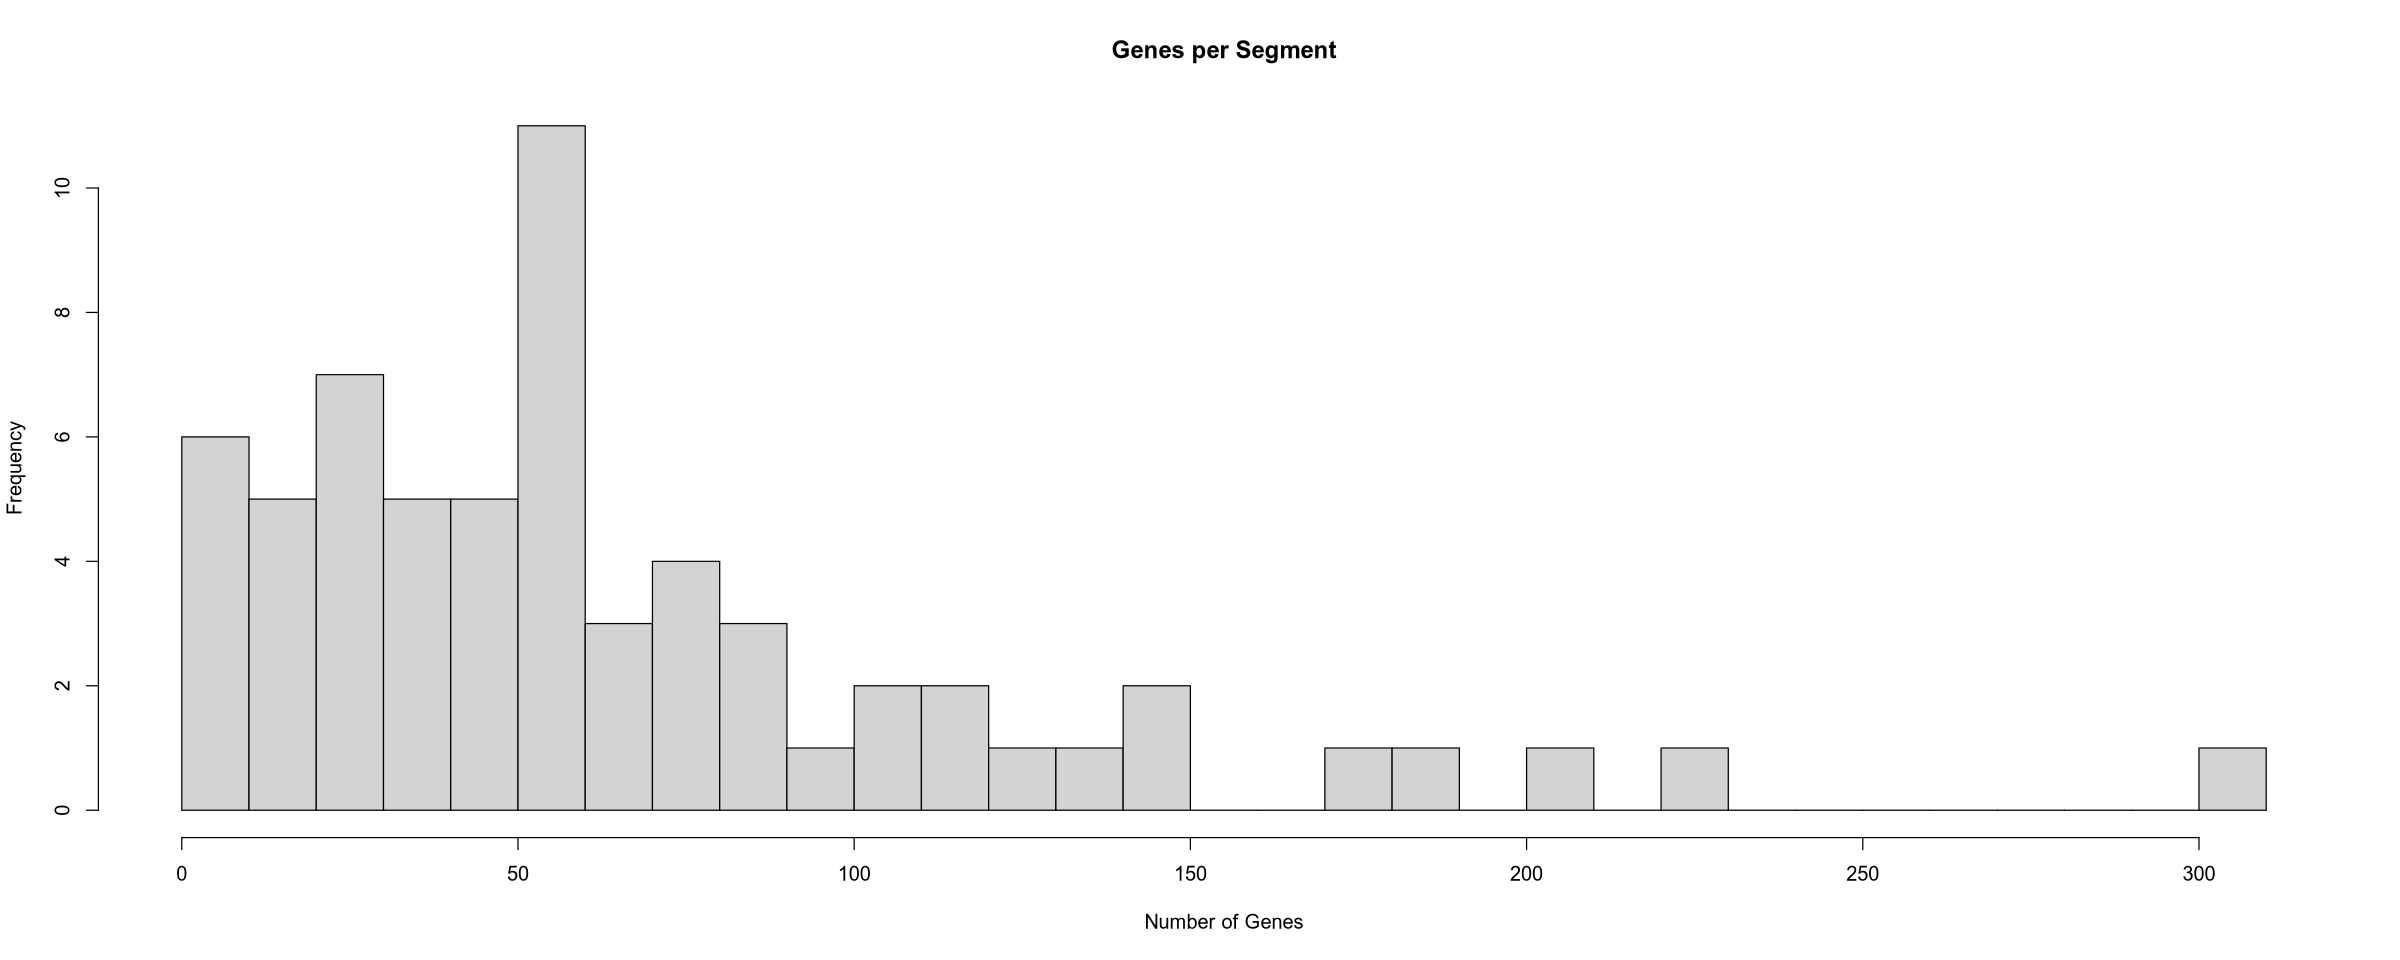

In [201]:
# segment_genes_full: first col is segment, second col is comma-separated genes
library(dplyr)
genes_per_segment <- segment_genes_full %>%
  mutate(gene_count = sapply(strsplit(.[[2]], ","), length))

hist(genes_per_segment$gene_count, breaks=30, main="Genes per Segment", xlab="Number of Genes")


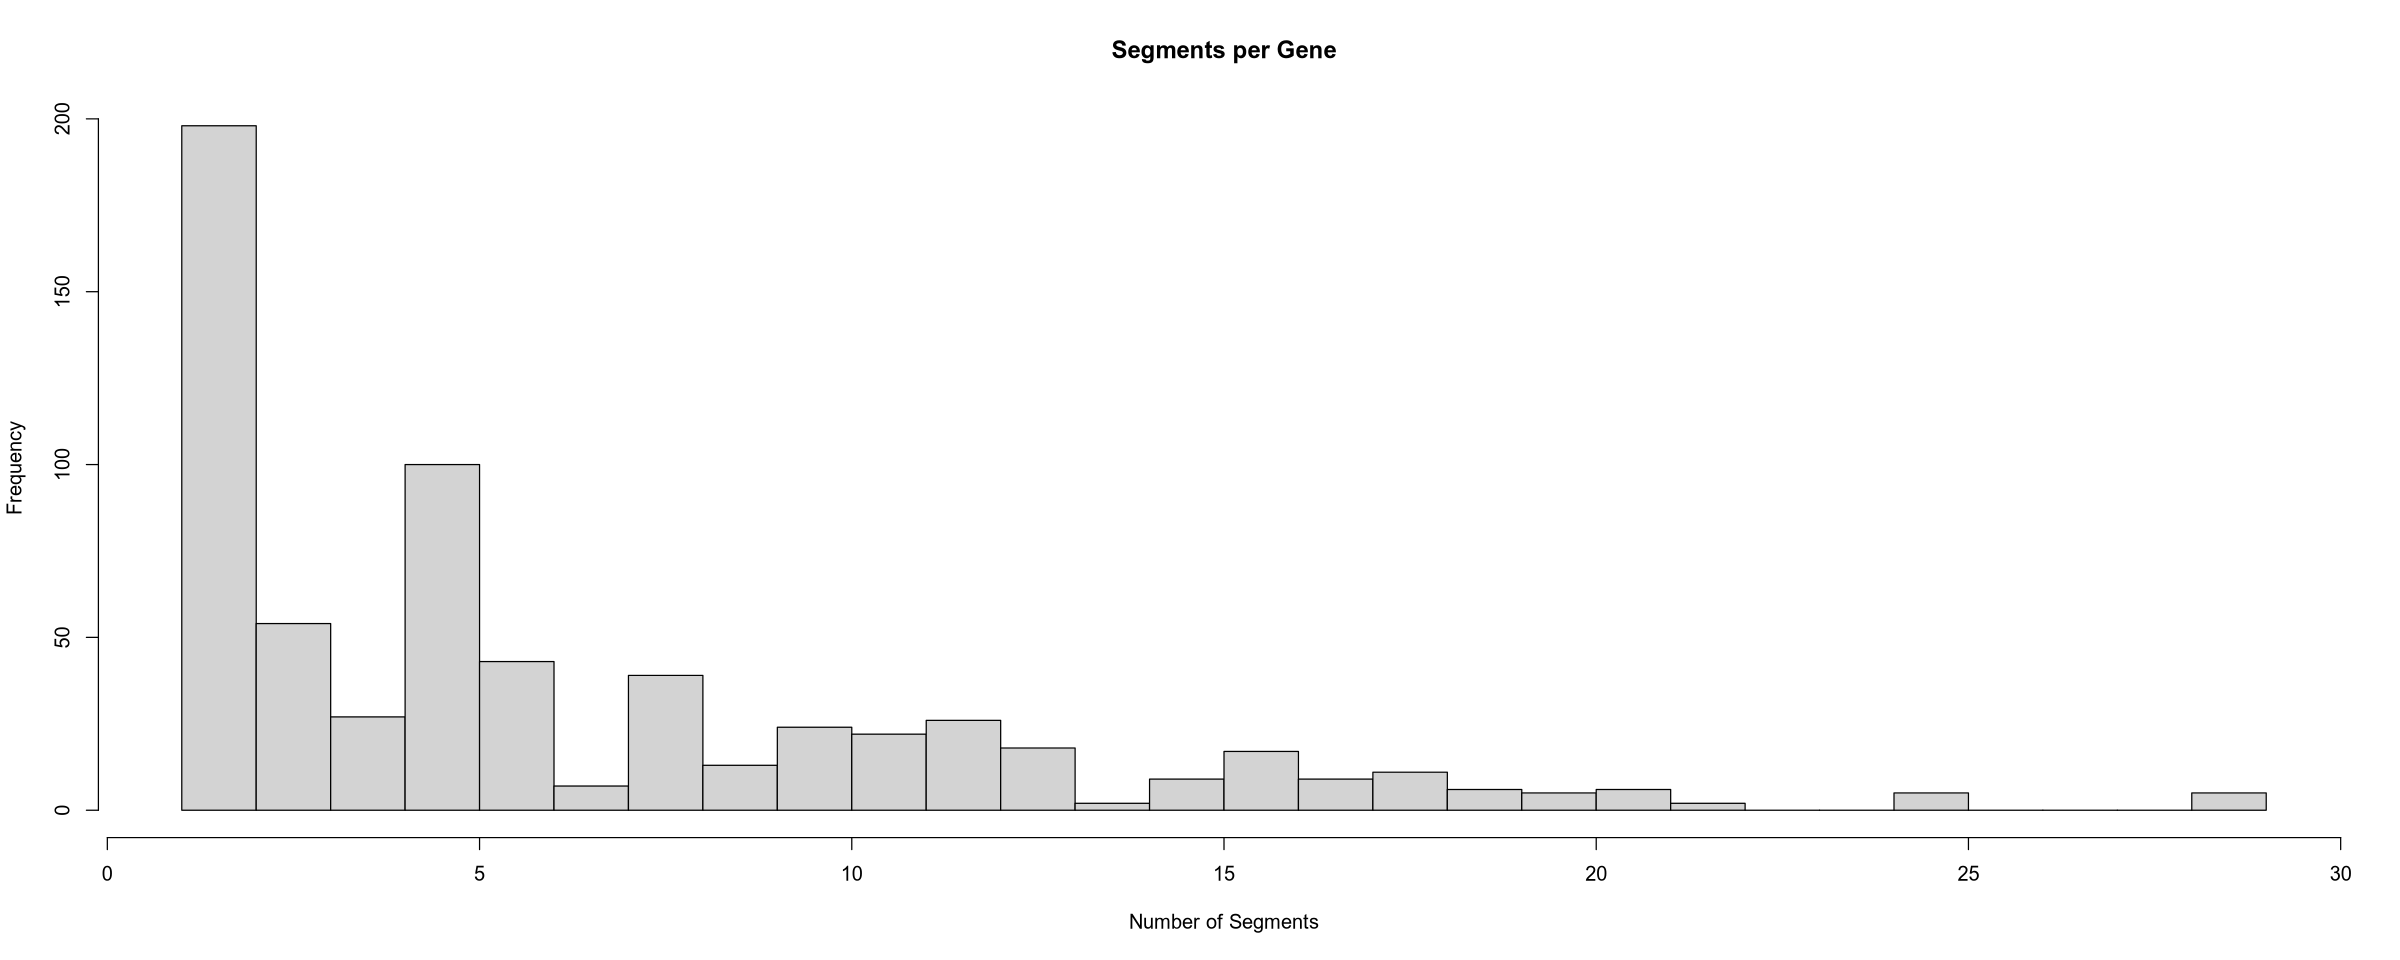

In [202]:
# gene_segments: first col is gene, second col is comma-separated segments
segments_per_gene <- gene_segments %>%
  mutate(segment_count = sapply(strsplit(.[[2]], ","), length))

hist(segments_per_gene$segment_count, breaks=30, main="Segments per Gene", xlab="Number of Segments")


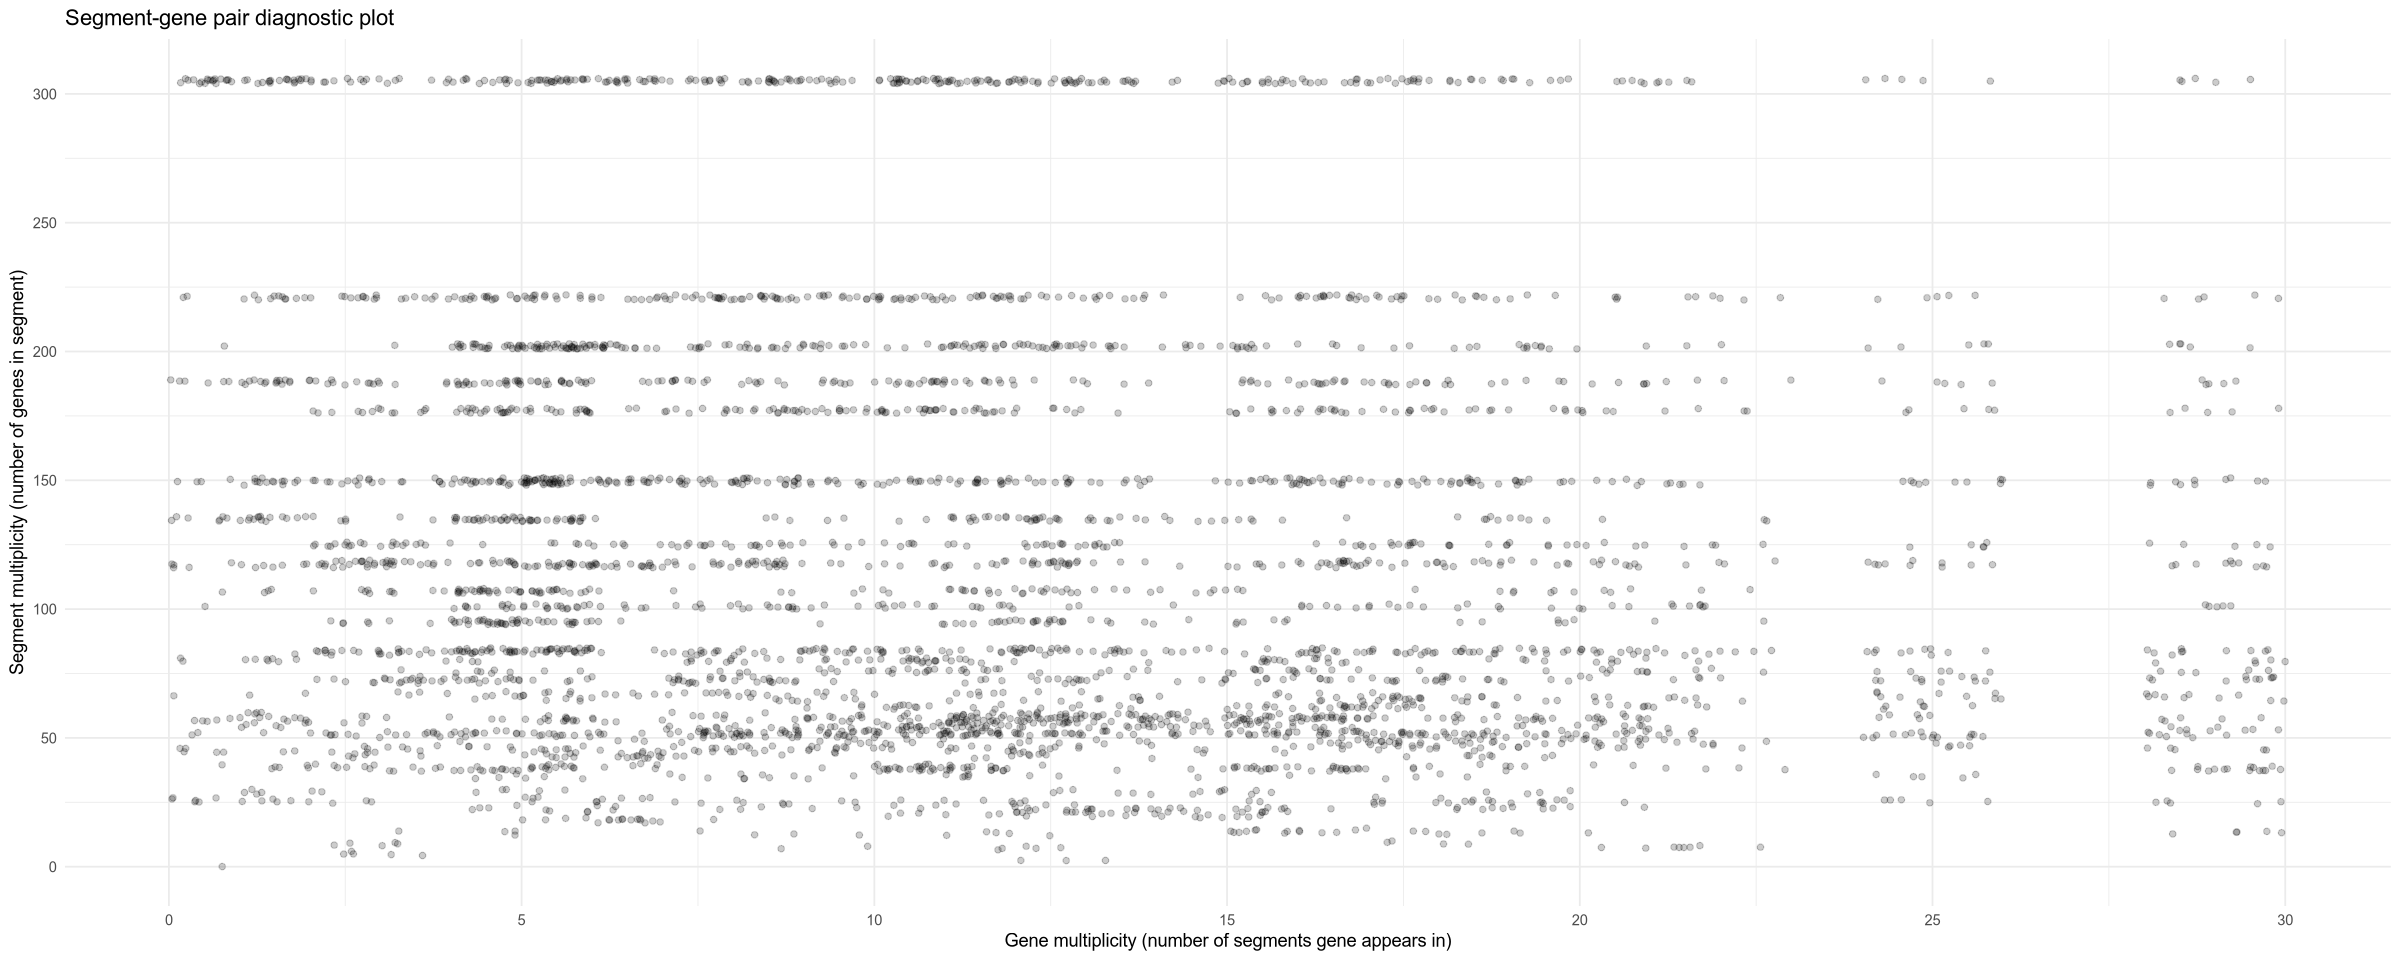

In [208]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Expand to segment-gene pairs
pairs <- segment_genes_full %>%
  separate_rows(genes, sep = ",")

# Calculate gene multiplicity (how many segments for each gene)
gene_mult <- pairs %>%
  count(genes, name = "gene_multiplicity")

# Calculate segment multiplicity (how many genes in each segment)
seg_mult <- pairs %>%
  count(Segment, name = "segment_multiplicity")

# Join multiplicity info back to each pair
pairs <- pairs %>%
  left_join(gene_mult, by = "genes") %>%
  left_join(seg_mult, by = "Segment")

# Plot
ggplot(pairs, aes(x = gene_multiplicity, y = segment_multiplicity)) +
  geom_jitter(alpha = 0.2, width = 1, height = 1) +
  scale_x_continuous(breaks = scales::pretty_breaks()) +
  scale_y_continuous(breaks = scales::pretty_breaks()) +
  labs(
    x = "Gene multiplicity (number of segments gene appears in)",
    y = "Segment multiplicity (number of genes in segment)",
    title = "Segment-gene pair diagnostic plot"
  ) +
  theme_minimal()
